<a href="https://colab.research.google.com/github/namek97/Code_accumulative/blob/main/Code_acd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#installing TA-LIB
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib
import talib as ta

--2023-03-12 12:18:53--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-03-12 12:18:53--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-03-12 12:18:53--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [31]:
#installing yfinance
!pip install yfinance 
import yfinance as yf
import pandas as pd
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",None)
import copy 
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
!pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36085 sha256=52c88da0b7ade7dd328e93d87d19d45f1dc48f1beac53db545a3905ac0a01801
  Stored in directory: /root/.cache/pip/wheels/50/12/d5/bbea58569f0c28fa7a6cb72cc76303ecd20d40c977742486df
Successfully built nsepy


               Close     slowk     slowd       rsi       cci      macd  \
Close       1.000000  0.066572  0.070695  0.043639  0.013524  0.174953   
slowk       0.066572  1.000000  0.889023  0.655834  0.822046  0.289148   
slowd       0.070695  0.889023  1.000000  0.654751  0.762146  0.365612   
rsi         0.043639  0.655834  0.654751  1.000000  0.818303  0.758400   
cci         0.013524  0.822046  0.762146  0.818303  1.000000  0.427193   
macd        0.174953  0.289148  0.365612  0.758400  0.427193  1.000000   
macdsignal  0.187727  0.130221  0.191412  0.631900  0.246680  0.955317   
macdhist   -0.007096  0.562250  0.625636  0.549063  0.657598  0.334663   
APO         0.123223  0.166199  0.230695  0.642288  0.319282  0.914650   
Aroon       0.030135  0.397210  0.507742  0.736283  0.667796  0.598015   
Ultosc      0.150295  0.770149  0.803175  0.789151  0.797879  0.509242   
ROC         0.041663  0.569375  0.619463  0.750565  0.730233  0.596819   

            macdsignal  macdhist     

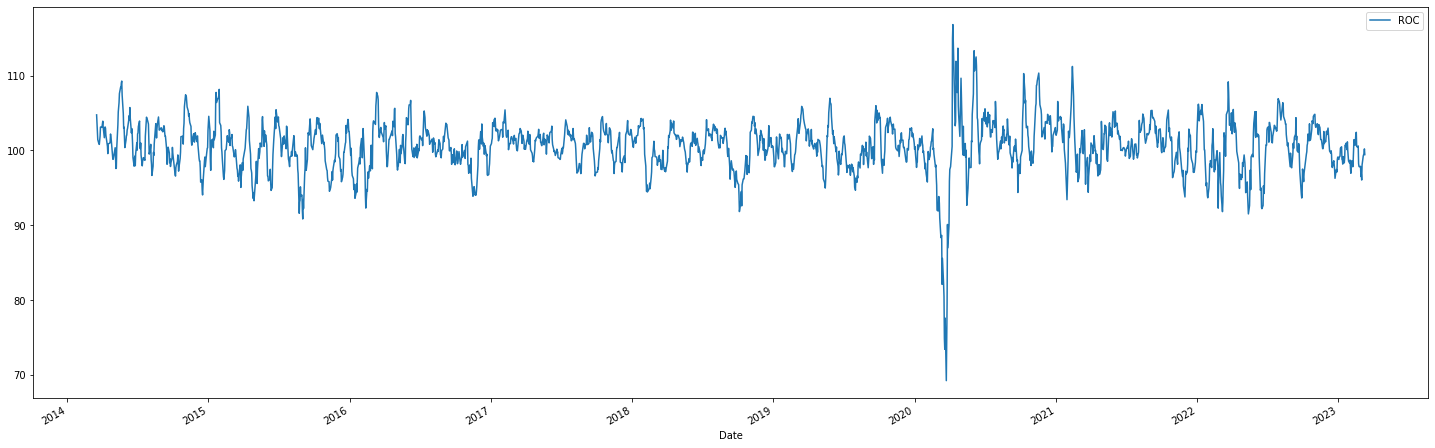

In [41]:
#stock_list=["^NSEI","NIFTYBEES.NS","^INDIAVIX"]

findat=pd.DataFrame()

dat = yf.Ticker("^NSEI")

df = dat.history(start="2014-03-03",interval="1d")
findat["Close"]=df["Close"]



#stochastic
findat['slowk'], findat['slowd'] = ta.STOCH(df['High'],df['Low'],df['Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
#rsi
findat['rsi']= ta.RSI(df['Close'], timeperiod=14)
#cci
findat['cci'] = ta.CCI(df['High'], df['Low'], df['Close'],timeperiod=14)
#macd
findat['macd'],findat['macdsignal'],findat['macdhist'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
#apo
findat["APO"]= ta.APO(df['Close'], fastperiod=12, slowperiod=26, matype=0)
#AROON
findat["Aroon"]= ta.AROONOSC(df['High'],df['Low'], timeperiod=14)
#ultimate osc
findat["Ultosc"]= ta.ULTOSC(df['High'],df['Low'],df['Close'], timeperiod1=7, timeperiod2=14, timeperiod3=28)
#roc
findat["ROC"]=ta.ROCR100(df["Close"], timeperiod=10)
findat.tail()

findat[['ROC']].plot(figsize=(25,8))
#!pip install seaborn
#import seaborn as sns
print(findat.corr())

In [39]:
import nsepy 
from datetime import date

        # Get VIX value of yesterday
#df2 = pd.DataFrame(nsepy.get_history(symbol="INDIAVIX", start=date(2014,3,3), end=date.today(), index=True))
        # IF no data found on yesterday, go back to previous day because it may be weekend
#print(df2)
#from nsepy import get_index_pe_history
#nifty_pe = get_index_pe_history(symbol="NIFTY",
                                #start=date(2015,1,1),
                                #end=date(2015,1,10))

KeyboardInterrupt: ignored